<a href="https://colab.research.google.com/github/Nutzagag-Cloud/My-Python-Project-/blob/main/Birth_Rate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
births = pd.read_csv("births_ratedata.csv") 

#Show head of data 

In [12]:
births['decade'] = 10 * (births['year'] // 10)
pivot = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
print(births.head())

            year  month  day gender  births  dayofweek  decade
1969-01-01  1969      1    1      F    4046          2    1960
1969-01-01  1969      1    1      M    4440          2    1960
1969-01-02  1969      1    2      F    4454          3    1960
1969-01-02  1969      1    2      M    4548          3    1960
1969-01-03  1969      1    3      F    4548          4    1960


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#Gender by Births

In [8]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

We immediately see that male births outnumber female births in every decade.To see this trend a bit clear, we can use plotting tools in Pandas to visualize the total number of births by years

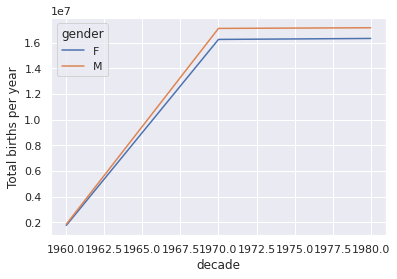

In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() 
birth_decade = pivot 
birth_decade.plot() 
plt.ylabel("Total births per year") 
plt.show()

#Data exploration

we can pull out of this dataset using the Pandas tools. start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to dropout outliers.

In [14]:
import numpy as np
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [15]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

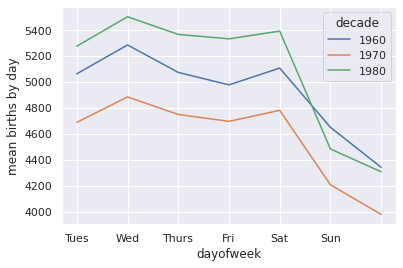

In [16]:
births.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

By this Graph we can tell that births are slightly less common on weekends than on weekdays.

Another interesting view is to plot the mean number of births by the day of the year. but first we need to group the data by month and day separately.

In [17]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])
print(births_month.head())

births_month.index = [pd.datetime(2012, month, day)
                      for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


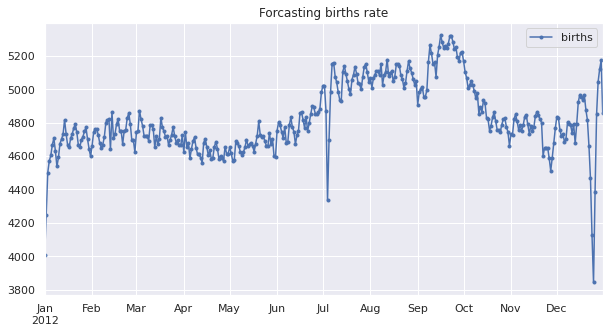

In [19]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(title="Forcasting births rate",marker=".",figsize=(10,5),label="daily cases",ax=ax)
plt.show()

Focusing on the month and day only, now we have a time series reflect the average number of births by date of the year. From this we can use  plot method to plot the data.